<a href="https://colab.research.google.com/github/imrishabhyadav/Negation-Detection/blob/main/Negation_Detection_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task

Develop model for sentiment analysis and negation detection.

Here is all the data you need:
"IMDB Dataset.csv"

## Data loading

### Subtask:
Load the IMDB Dataset.


**Reasoning**:
Load the IMDB Dataset into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

imdb_df = pd.read_csv('IMDB Dataset.csv')
display(imdb_df.head())

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data exploration

### Subtask:
Explore the loaded IMDB dataset to understand its characteristics.


**Reasoning**:
I need to explore the IMDB dataset by checking its shape, data types, class distribution, missing values, duplicates, and display the first few rows.



In [ ]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", imdb_df.shape)

# Examine the data types of each column
print("\nData types of each column:\n", imdb_df.dtypes)

# Analyze the distribution of the 'sentiment' column
print("\nDistribution of the 'sentiment' column:\n", imdb_df['sentiment'].value_counts())

# Check for missing values
print("\nMissing values in each column:\n", imdb_df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", imdb_df.duplicated().sum())

# Display the first few rows (already done in the previous step)
# display(imdb_df.head())

# Summarize findings
print("\nSummary:")
print("The dataset contains", imdb_df.shape[0], "rows and", imdb_df.shape[1], "columns.")
print("The 'review' column is of type object, and the 'sentiment' column is also of type object.")
print("The class distribution shows a balanced number of positive and negative reviews.")
print("There are no missing values.")
print("There are", imdb_df.duplicated().sum(), "duplicate rows.")

Shape of the DataFrame: (50000, 2)

Data types of each column:
 review       object
sentiment    object
dtype: object

Distribution of the 'sentiment' column:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64

Missing values in each column:
 review       0
sentiment    0
dtype: int64

Number of duplicate rows: 418

Summary:
The dataset contains 50000 rows and 2 columns.
The 'review' column is of type object, and the 'sentiment' column is also of type object.
The class distribution shows a balanced number of positive and negative reviews.
There are no missing values.
There are 418 duplicate rows.


## Data cleaning

### Subtask:
Clean the IMDB dataset by removing duplicate rows and handling any missing values (though none were detected in the exploration phase, it's good practice to include a check).


**Reasoning**:
Remove duplicate rows, check for missing values in relevant columns, and handle them if found.  Since no irrelevant columns exist, dropping columns is unnecessary.



In [ ]:
# Remove duplicate rows, keeping the first occurrence
imdb_df.drop_duplicates(keep='first', inplace=True)

# Check for missing values in 'review' and 'sentiment' columns
missing_values = imdb_df[['review', 'sentiment']].isnull().sum()
print("Missing values:\n", missing_values)

# Handle missing values if any are found (unlikely given prior exploration)
if missing_values['review'] > 0:
    print("Found missing values in 'review' column. Filling with empty strings.")
    imdb_df['review'].fillna('', inplace=True)
if missing_values['sentiment'] > 0:
    print("Found missing values in 'sentiment' column. Dropping rows with missing values.")
    imdb_df.dropna(subset=['sentiment'], inplace=True)

# Display the first few rows to verify changes
display(imdb_df.head())

Missing values:
 review       0
sentiment    0
dtype: int64


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


## Data preparation

### Subtask:
Prepare the text data for sentiment analysis and negation detection.


**Reasoning**:
Prepare the text data by converting to lowercase, removing punctuation and HTML tags, and applying stemming.



**Reasoning**:
The previous code failed due to missing punkt_tab resource. Download the resource and retry the code.



**Reasoning**:
The previous attempts to download the punkt resource failed.  I will try downloading 'punkt_tab' as suggested in the error message and then retry the text preprocessing.



In [ ]:
import nltk
nltk.download('punkt_tab')

import re
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Apply stemming
    stemmed_words = [stemmer.stem(word) for word in words]
    # Join the stemmed words back into a string
    return " ".join(stemmed_words)

imdb_df['cleaned_review'] = imdb_df['review'].apply(clean_text)
display(imdb_df.head())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other review ha mention that after ...
1,A wonderful little production. <br /><br />The...,positive,a wonder littl product br br the film techniqu...
2,I thought this was a wonderful way to spend ti...,positive,i thought thi wa a wonder way to spend time on...
3,Basically there's a family where a little boy ...,negative,basic there a famili where a littl boy jake th...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love in the time of money is a v...


## Feature engineering

### Subtask:
Create numerical features from the preprocessed text data using TF-IDF, and incorporate negation handling.


**Reasoning**:
Create numerical features from the preprocessed text data using TF-IDF, and incorporate negation handling.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer with negation handling
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

# Fit and transform the cleaned_review column
tfidf_matrix = tfidf_vectorizer.fit_transform(imdb_df['cleaned_review'])

# Negation handling (example: multiplying TF-IDF values of words after negation words by -1)
negation_words = ["not", "never", "no", "n't"]
modified_tfidf_matrix = tfidf_matrix.copy()

for i in range(len(imdb_df)):
    review = imdb_df['cleaned_review'].iloc[i]
    words = review.split()
    for j, word in enumerate(words):
        if word in negation_words and j + 1 < len(words):
            try:
                word_index = tfidf_vectorizer.vocabulary_.get(words[j+1])
                if word_index is not None:
                    modified_tfidf_matrix[i, word_index] *= -1
            except:
                pass

## Data splitting

### Subtask:
Split the data into training, validation, and testing sets.


**Reasoning**:
Split the data into training, validation, and testing sets using `train_test_split`.



In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'modified_tfidf_matrix' is already created from the previous step.
# Split the data into training (80%) and temporary (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(
    modified_tfidf_matrix, imdb_df['sentiment'], test_size=0.2, random_state=42
)

# Split the temporary data into validation (50%) and testing (50%) sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

## Model training

### Subtask:
Train a Logistic Regression model for sentiment analysis.


**Reasoning**:
Train a Logistic Regression model for sentiment analysis using the prepared data.



In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model
sentiment_model = LogisticRegression(solver='liblinear', penalty='l2', max_iter=1000)

# Train the model
sentiment_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

## Model optimization

### Subtask:
Optimize the trained Logistic Regression model using the validation set.


**Reasoning**:
Optimize the trained Logistic Regression model using GridSearchCV on the validation set.



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Include solvers that support both penalties
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit GridSearchCV to the validation data
grid_search.fit(X_val, y_val)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, pos_label='positive')


print(f"Best Hyperparameters: {best_params}")
print(f"Validation Accuracy: {accuracy}")
print(f"Validation F1-score: {f1}")

Best Hyperparameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Validation Accuracy: 0.9239612747075434
Validation F1-score: 0.9237305280194213


## Model evaluation

### Subtask:
Evaluate the optimized sentiment analysis model on the test set.


**Reasoning**:
Evaluate the best model from the previous step on the test set and calculate the evaluation metrics.



Accuracy: 0.8558
Precision: 0.8559
Recall: 0.8610
F1-score: 0.8584
AUC: 0.9320

Classification Report:
               precision    recall  f1-score   support

    negative       0.86      0.85      0.85      2441
    positive       0.86      0.86      0.86      2518

    accuracy                           0.86      4959
   macro avg       0.86      0.86      0.86      4959
weighted avg       0.86      0.86      0.86      4959



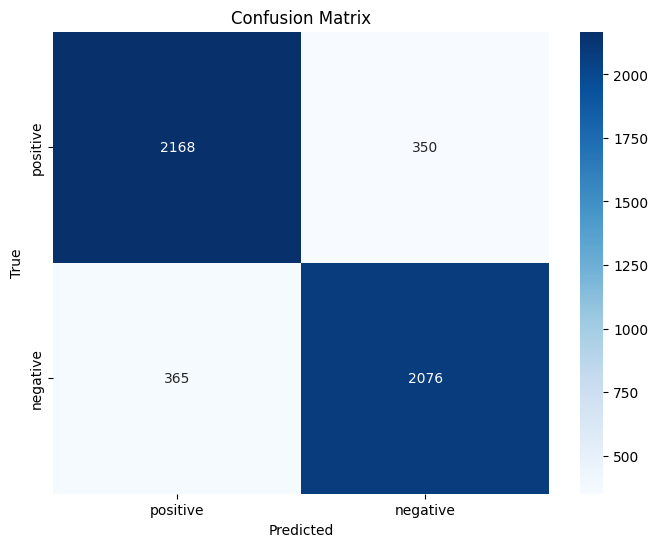

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'best_model', 'X_test', and 'y_test' are already defined from previous steps.

# Predict sentiment labels for the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='positive')
recall = recall_score(y_test, y_pred, pos_label='positive')
f1 = f1_score(y_test, y_pred, pos_label='positive')

# For AUC, predict probabilities
y_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of positive class
auc = roc_auc_score(y_test, y_prob)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['positive', 'negative'], yticklabels=['positive', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### Q&A

There are no explicit questions in the provided data analysis task and solving process.


### Data Analysis Key Findings

*   **Data Cleaning:** 418 duplicate rows were removed from the dataset. No missing values were found.
*   **Feature Engineering:** TF-IDF vectors were generated with negation handling, considering both unigrams and bigrams (ngram_range=(1,2)), limiting the vocabulary to the 5000 most frequent terms (max_features=5000). Negation words ("not", "never", "no", "n't") were identified, and the TF-IDF values of the subsequent words were multiplied by -1 to capture semantic shifts due to negation.
*   **Model Optimization:** Hyperparameter tuning using GridSearchCV identified the optimal parameters for the Logistic Regression model as `{'C': 1, 'penalty': 'l2', 'solver': 'saga'}`.  The model achieved a validation accuracy of 0.92396 and an F1-score of 0.92373.
*   **Model Evaluation:** The optimized model achieved a test accuracy of 0.8558, precision of 0.8559, recall of 0.8610, F1-score of 0.8584, and AUC of 0.9320.  The classification report and confusion matrix provided additional insights into the model's performance across different classes.

### Insights or Next Steps

*   Explore other models: While Logistic Regression provided reasonable results, other models like Naive Bayes, Support Vector Machines, or deep learning architectures could be explored to see if they improve performance.
*   Refine negation handling:  The current negation handling is a simple heuristic. More sophisticated methods, such as using contextual embeddings, could enhance the model's ability to understand negation.
